<a href="https://colab.research.google.com/github/388050gomes/Detectando-fraudes-cartao-credito/blob/main/Fraudes_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecção Fraudes em Cartões de Crédito

Passar por uma situação de fraude de cartão de crédito é algo terrível, pois pode trazer sérios problemas tanto ao consumidor como aos bancos. Pois os golpistas podem gastar todo o limite do cartão em compras indevidas em poucos minutos, e o prejuizo "cair na conta" do banco ou do consumidor.

Esse é um problema que tem assolado o mundo. Conforme mostra o estudo Mapa da Fraude, da consultoria Clearsale, no Brasil foram 2,6 milhões de tentativas observadas no primeiro semestre de 2021, considerando cerca de 182 milhões de transações via cartão de crédito.

A Confederação Nacional de Dirigentes Lojistas (CNDL) e o Serviço de Proteção ao Crédito (SPC) afirmam que a cada 10 brasileiros 6 caíram em algum tipo de fraude financeira entre julho de 2020 e julho de 2021.



<p align=center>
<img src="https://media.istockphoto.com/photos/hacker-in-hoodie-web-interface-and-data-room-double-exposure-picture-id1309734244?b=1&k=20&m=1309734244&s=170667a&w=0&h=mCtg1pomIjXJNawN5KvM2356y-WRGAsy7y4tQ9rUxoI=" width="60%"></p>

Dentre os tipos mais comuns de fraudes em cartão de crédito, estão:

* clonagem de cartão

Atualmente uma maneira comum de clonagem de cartão se dá quando do pagamento em sites falsos.

* central de atendimento falsa

Criminosos fingindo serem representantes de bancos ou de administradoras de cartões fazem contato telefônico com as vitimas para obterem os dados do cartão de crédito.

* troca de cartão e roubo de senha

O roubo da senha se dá quando o criminoso pede para o consumidor digitar a senha em uma tela que seria o campo do valor da compra. Já a troca do cartão é feita quando o golpista troca o cartão da vítima por outro similar.

A categoria de produto mais fraudado segue sendo a dos celulares, respondendo por 5,1% das tentativas de fraude, seguido por produtos eletrônicos (4,9%) e games (4,2%).

Assim, neste trabalho abordaremos o problema das fraudes em cartões de crédito. que com o uso de machine learning faremos a detecção de fraudes nas operações de crédito.

## Importação dos Dados


Os dados foram gerados por empresas de cartão de crédito no continente europeu, referentes a dois dias de operação financeira. O site com maiores explicações do dataset pode ser verificado neste [site](https://www.kaggle.com/mlg-ulb/creditcardfraud).

Antes de mais nada, vamos importar os pacotes necessários para execução da análise.

In [1]:
# importar pacotes 

# suprimir os warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# instalar a biblioteca scikit-plot
!pip install -q scikit-plot

In [2]:
# Importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

from imblearn.under_sampling import RandomUnderSampler

# configurar plots
sns.set_style('dark')

Feito isso, agora vamos importar nosso dataset para o DataFrame. 

In [3]:
# importar dados para um DataFrame
df = pd.read_csv('https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1')

## Análise Exploratória

O objetivo neste tópico é verificar o dataset, se o mesmo encontra-se pronto para aplicar o modelo machine learning. Caso contrário, faremos uma prepararação dos dados anteriormente.


Então, começamos nossa verificação por visualizar as primeiras entradas do dataset.

In [4]:
# verificando as 5 primeiras entradas
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


O resumo estatístico evidencia a ocorrência de discrepâncias nas variáveis, caso haja.

In [5]:
# resumo estatístico
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Outro ponto que devemos observar é quanto aos valores ausentes nos dados.

In [6]:
# valores nulos
df.isnull().sum().max()

0

Por fim vamos verificar como a variável *Class* está distribuída em transações normais e fraudulentas.

Em que para ser caracterizada:

fraude: `Class == 1`

normal: `Class == 0`


In [7]:
# Balanceamento dos dados
print(df.Class.value_counts())

# percentual de transações fraudulentas
(df[df.Class == 1].shape[0] / df.shape[0])*100

0    284315
1       492
Name: Class, dtype: int64


0.1727485630620034

[]

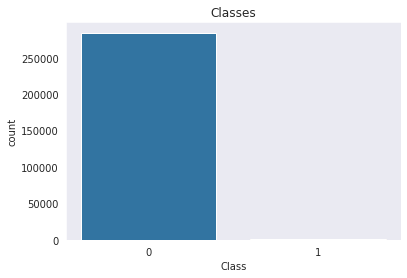

In [8]:
# plotar balanceamento de Class
fig, ax = plt.subplots()
sns.countplot('Class', data=df, ax=ax)
ax.set_title('Classes')
plt.plot()

Portanto, os dados estão desbalanceados.

Os plots abaixo analisam as distribuições das classes de acordo com o tempo e os valores. 

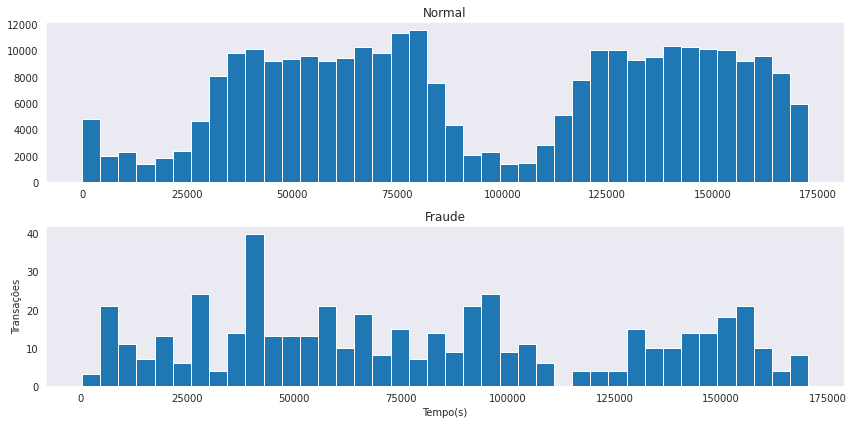

In [9]:
# histograma - Time
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,6))
ax[0].hist(df.Time[df.Class == 0], bins=40)
ax[0].set_title('Normal')

ax[1].hist(df.Time[df.Class == 1], bins=40)
ax[1].set_title('Fraude')

plt.xlabel('Tempo(s)')
plt.ylabel('Transações')
plt.tight_layout()

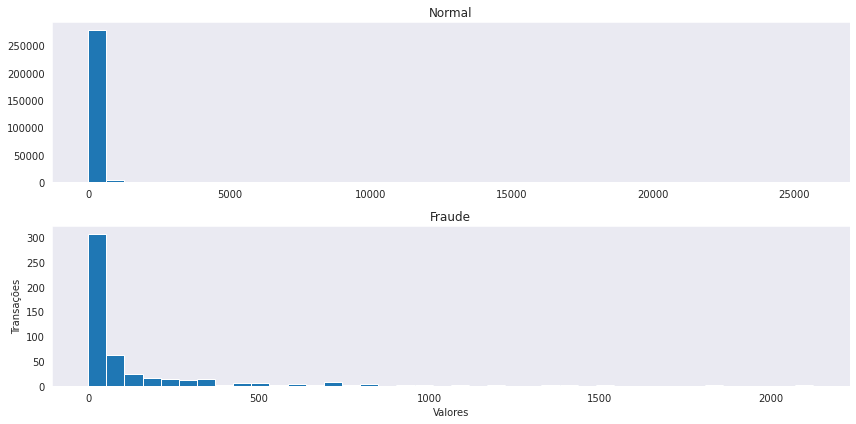

In [10]:
# histogrma - Amount
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,6))
ax[0].hist(df.Amount[df.Class == 0], bins = 40)
ax[0].set_title('Normal')

ax[1].hist(df.Amount[df.Class == 1], bins =40)
ax[1].set_title('Fraude')

plt.xlabel('Valores')
plt.ylabel('Transações')
plt.tight_layout()

Para verificar eventual diferença no padrão de transações em relação à dimensão dos valores, plotamos o boxplot abaixo.

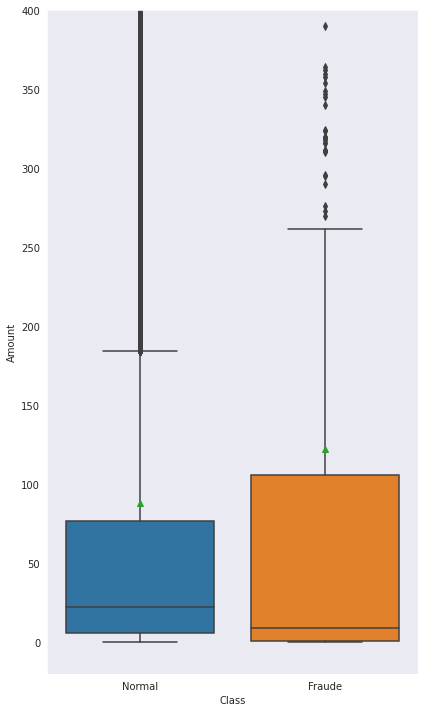

In [11]:
# boxplot
fig, ax = plt.subplots(figsize=(6,10), sharex=False)
sns.boxplot(df.Class, df.Amount, showmeans=True, ax=ax)
plt.xticks([0, 1], ['Normal', 'Fraude'])
plt.ylim((-20, 400))

plt.tight_layout()

Fazendo a correlação das variáveis dos dados desbalanceados, observamos que não traz informações relevantes.

In [12]:
# plotar matriz de correlação
corr = df.corr()

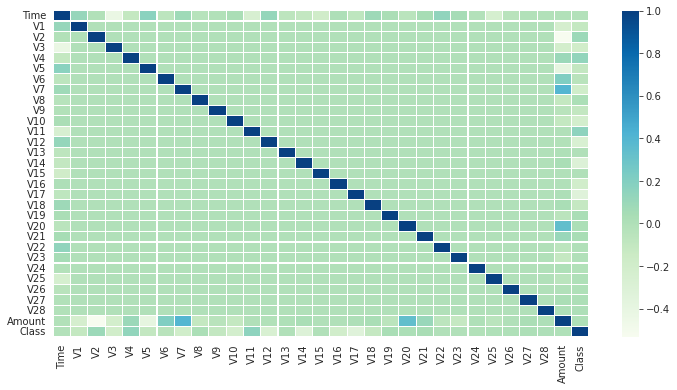

In [13]:
# matriz de correlação
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="GnBu", ax=ax)
plt.show()

## Preparação dos Dados

Como os dados estão desbalanceados, vamos preparar os dados para usá-los no modelo machine learning.

Para isso seguimos a seguinte sequência:

* Normalizar os dados de `Time` e `Amount`
* Dividir o conjunto de dados entre treino e validação
* Balancear o conjunto de dados

**Normalização dos dados de Time e Amount**

In [14]:
# normalizando variáveis Time e Amount
df_norm = df.copy()

# inserir variáveis padroninadas 
std_scaler = StandardScaler()
df_norm['std_amount'] = std_scaler.fit_transform(df_norm['Amount'].values.reshape(-1,1))
df_norm['std_time'] = std_scaler.fit_transform(df_norm['Time'].values.reshape(-1,1))

# excluir variáveis
df_norm.drop(['Time', 'Amount'], axis=1, inplace=True)

df_norm.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


**Dividir entre conjuntos de Treino e Validação**

In [15]:
# separar as variáveis para x e y
X = df_norm.drop('Class', axis=1)
y = df_norm['Class']

# dividir o Dataset em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, shuffle=True)

**Balanceamento dos dados**

0    369
1    369
Name: Class, dtype: int64


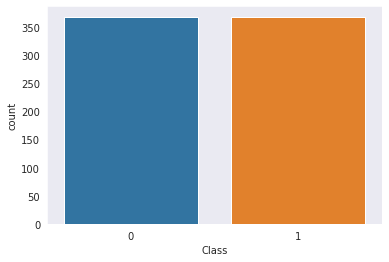

In [16]:
# balanceamento da classe
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# verificar o balanceamento
print(pd.Series(y_rus).value_counts())

# plotar a nova distribuição de classes
sns.countplot(y_rus);

## Modelo de Machine Learning

Agor sim, com os dados balanceados podemos fazer um classificador através do modelo de regressão logística.

### Construir modelo para classificação

Vamos treinar e prever o modelo.

In [17]:
# instanciar e treinar um modelo de Regressão Logística
np.random.seed(2)
model = LogisticRegression()
model.fit(X_rus, y_rus)

# fazer as previsões em cima dos dados de teste
y_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)

Feito isso, fazemos a avaliação do modelo.

### Avaliar desempenho do modelo

Utilizaremos as seguintes métricas para avaliar o modelo:

* Relatório de classificação
* Acurácia
* AUC (área sobre a curva)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9739    0.9867     71079
           1     0.0551    0.8780    0.1037       123

    accuracy                         0.9738     71202
   macro avg     0.5274    0.9260    0.5452     71202
weighted avg     0.9982    0.9738    0.9852     71202

Acurácia: 0.9738

AUC: 0.9260



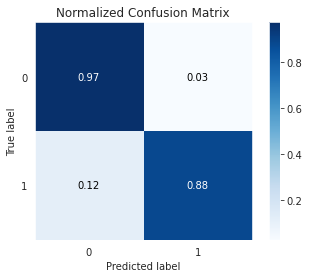

In [18]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_val, y_pred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_val, y_pred)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_val, y_pred)))

## Previsões no Conjunto de testes

Devemos separar o conjunto de testes

In [19]:
# criando o conjunto de teste
test = df.sample(frac=0.15, random_state=0)

# drop das linhas de teste
df = df.drop(test.index)

Novamente, vamos normalizar as variáveis Time e Amount. Agora, para o conjunto de testes.

In [20]:
# padronizar as colunas Time e Amount - Teste
test_clean = test.copy()

std_scaler = StandardScaler()
test_clean['std_amount'] = std_scaler.fit_transform(test_clean['Amount'].values.reshape(-1, 1))
test_clean['std_time'] = std_scaler.fit_transform(test_clean['Time'].values.reshape(-1, 1))

test_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

Após isso separamos as variáveis para X e y.

In [21]:
# separar variáveis entre X e y
X_test = test_clean.drop('Class', axis=1)
y_test = test['Class']

O passo seguinte é prever o modelo.

In [22]:
# fazer as previsões em cima dos dados de teste
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

Para visualizar os resultados, plotamos a matriz de confusão e medimos nas mesmas métricas já citadas.

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9749    0.9872     42647
           1     0.0598    0.9189    0.1123        74

    accuracy                         0.9748     42721
   macro avg     0.5298    0.9469    0.5498     42721
weighted avg     0.9982    0.9748    0.9857     42721

Acurácia: 0.9748

AUC: 0.9469



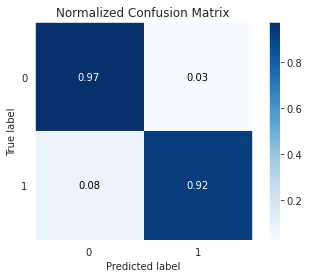

In [23]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

## Considerações Finais

Percebemos que para fazer um modelo que prevê fraudes em transações de cartão de crédito é demandada uma boa análise inicial e uma preparação adequada dos dados, caso necessário, para propor um modelo eficaz.